#import all the required libraries

In [49]:
import numpy as np
import pandas as pd
import math
import sklearn
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Importing dataset

In [50]:
data = pd.read_csv("https://raw.githubusercontent.com/yingchen0817/CSC460_Final_Project/main/Data/prices-split-adjusted.csv")
df = pd.DataFrame(data)

In [51]:
df.info()

# we are now going to see the # of stocks in our dataset
print('\n number of stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB

 number of stocks:  501
['MCO', 'SIG', 'CHD', 'KMX', 'FLR', 'AVB', 'TEL', 'HBI', 'TSCO', 'LRCX']


In [52]:
# head of the five stock in the dataset
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [53]:
df.tail()

,date,symbol,open,close,low,high,volume
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
851263,2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


# Data Information

In [54]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


# Check for Null data

In [55]:
# check for null and duplicate
print("null:", df.isnull().sum().sum())
print("dupe:", df.duplicated().sum())

# look at the size of data
print("Shape:", df.shape)

null: 0
dupe: 0
Shape: (851264, 7)


In [56]:
# from the result above, we can see there have no null value in the dataset
# so we can move to the next step.

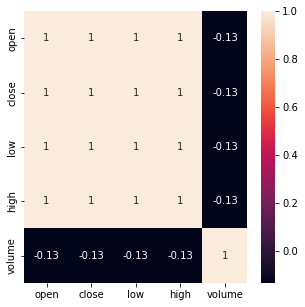

In [57]:
# Randomly choosing stock value for company
temp_df = df[df['symbol']=='CCL']

cormap = df.corr()
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cormap, annot = True)

In [58]:
# check out the stocks available
df['symbol'].value_counts()

KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [59]:
selected_stocks = ["AAPL", "AMZN", "NFLX", "GOOGL"]

In [60]:
# filter by selected stocks
# df = df[df['symbol'].isin(selected_stocks)]
# df['symbol'].value_counts()
# df[~df.symbol=="GOOGL"].head()

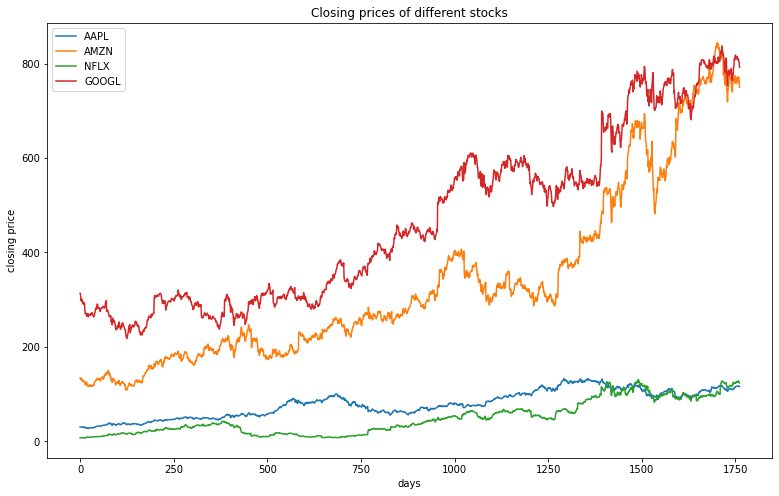

In [61]:
# plot closing prices for the selected stocks
fig, ax = plt.subplots(1, sharex=True, figsize=(13, 8))
for i in range(len(selected_stocks)):
    stock = selected_stocks[i]
    cond = df['symbol'] == stock
    ax.plot(df[cond]['close'].values, label=stock)

plt.title('Closing prices of different stocks')
plt.xlabel("days")
plt.ylabel("closing price")
plt.legend(loc='best')

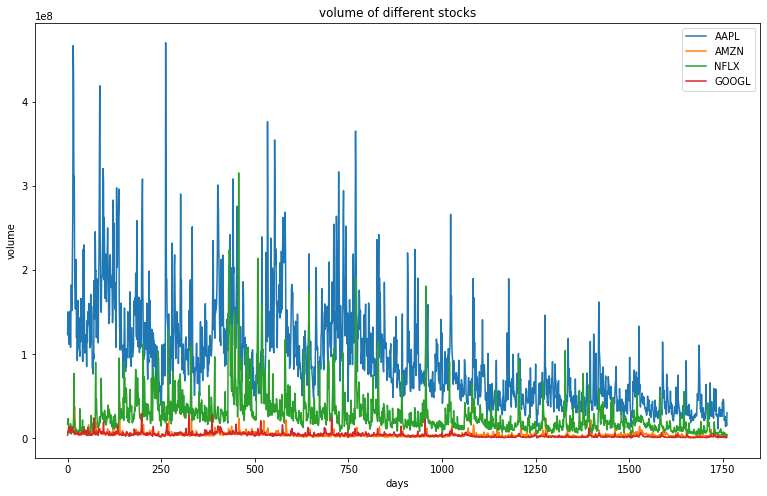

In [62]:
# plot volume for the selected stocks
fig, ax = plt.subplots(1, sharex=True, figsize=(13, 8))
for i in range(len(selected_stocks)):
    stock = selected_stocks[i]
    cond = df['symbol'] == stock
    ax.plot(df[cond]['volume'].values, label=stock)

plt.title('volume of different stocks')
plt.xlabel("days")
plt.ylabel("volume")
plt.legend(loc='best')

In [63]:
def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [64]:
top_corelated_values = get_corelated_col(cormap['close'], 0.60)
top_corelated_values

,corr value
open,0.999845
close,1.000000
low,0.999926
high,0.999925


In [65]:
df = df[top_corelated_values.index]
df.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


In [66]:
df.shape

(851264, 4)

In [67]:
X = df.drop(['close'], axis=1)
y = df['close']

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,open,low,high
0,0.076934,0.078020,0.077818
1,0.078078,0.076490,0.077374
2,0.072480,0.073254,0.073747
3,0.071911,0.072331,0.072309
4,0.072878,0.072712,0.072240


Prediction Model


In [69]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

1. Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [71]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
681011,97.750000,98.585524
681012,83.040001,84.471816
681013,39.750000,40.042867
681014,88.680000,89.898516
681015,42.630001,43.057401


In [72]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9999431626682372


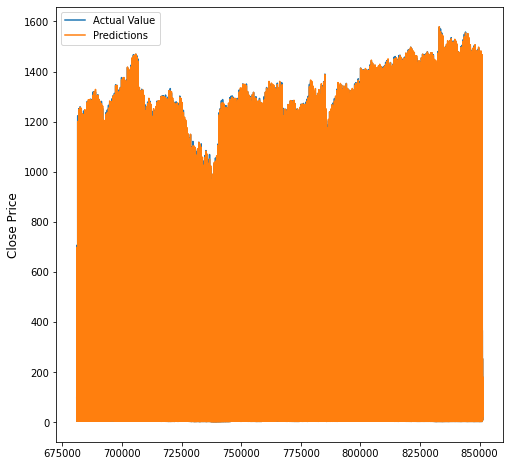

In [73]:
plt.figure(figsize=(8, 8))
plt.ylabel('Close Price', fontsize=12)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

LSTM

In [76]:
X_train_ = X_train.values.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.values.reshape(X_test.shape[0],X_test.shape[1],1)

In [77]:
from tensorflow.keras.layers import LSTM

def Reg():
    model = Sequential()
    
    model.add(LSTM(70, return_sequences=True, input_shape=(30,1)))
    model.add(LSTM(70, return_sequences=True))
    model.add(LSTM(70))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [79]:
# Prediction

y_pred_1 = model_1.predict(X_test_)

5321/5321 [==============================] - 9s 2ms/step


In [80]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
681011,97.750000,99.671959
681012,83.040001,84.825012
681013,39.750000,40.370968
681014,88.680000,91.142334
681015,42.630001,43.670963


In [81]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9998219782565112


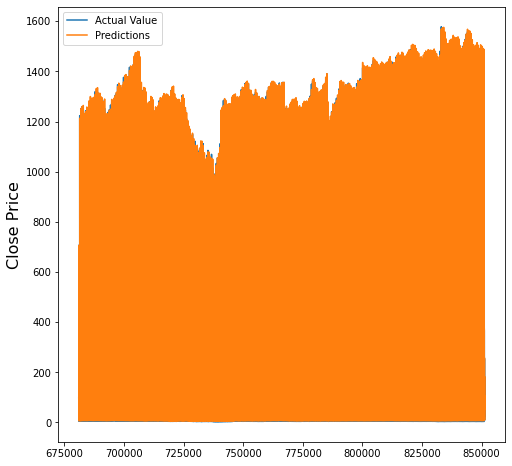

In [82]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()